# Exploratory Data Analysis for Greater London Authority

## What are the demographics of cyclists?

### Import Libraries 

In [6]:
#Import the basic libraries
import pandas as pd
import numpy as np
from datetime import datetime
from datetime import date
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn import datasets, linear_model, metrics
import datetime

#Import the basic visualisations
import seaborn as sns
import matplotlib.pyplot as plt

#Basics
import pandas as pd
import numpy as np
from datetime import datetime
from datetime import date

#Visualisation
import seaborn as sns
import matplotlib.pyplot as plt

#Advanced Importation
import statsmodels.api as sm
import statsmodels.stats.api as sms
from sklearn import datasets 
import numpy as np  
from sklearn import linear_model 
import pandas as pd 
import matplotlib.pyplot as plt 

# Import metrics for measuring linear model fit:
import sklearn
from sklearn import datasets 
from sklearn import linear_model
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from statsmodels.formula.api import ols

#Import warning to ignore any python warnings
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

### Import DataSets 

In [7]:
#Load the dataset
Central_London = pd.read_csv("Central London.csv")
Inner_London = pd.read_csv("Inner London.csv")
Outer_London = pd.read_csv("Outer London.csv")

### Data Exploration

In [8]:
# How can I deliminate the data
# Understanding the shape and nature of the data
Central_London.head(2)

,Survey wave (calendar quarter),Equivalent financial quarter,Site ID,Location,Survey date,Weather,Time,Period,Direction,Start hour,Start minute,Number of private cycles,Number of cycle hire bikes,Total cycles,Unnamed: 14,Unnamed: 15,Unnamed: 16
0,2014 Q1 (January-March),2013-14 Q4,CENCY001,Millbank (south of Thorney Street),"ven, 24/01/14",Dry,0600 - 0615,Early Morning (06:00-07:00),Northbound,6.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN
1,2014 Q1 (January-March),2013-14 Q4,CENCY001,Millbank (south of Thorney Street),"ven, 24/01/14",Dry,0615 - 0630,Early Morning (06:00-07:00),Northbound,6.0,15.0,15.0,0.0,15.0,NaN,NaN,NaN


In [9]:
# Understanding the shape and nature of the data
Inner_London.head(2)

,Survey wave (year),Site ID,Location,Survey date,Weather,Time,Period,Direction,Start hour,Start minute,Number of private cycles,Number of cycle hire bikes,Total cycles
0,2015.0,INNCY001,Grove Road,"mer, 20/05/15",Dry,0600 - 0615,Early Morning (06:00-07:00),Northbound,6.0,0.0,1.0,0.0,1.0
1,2015.0,INNCY001,Grove Road,"mer, 20/05/15",Dry,0615 - 0630,Early Morning (06:00-07:00),Northbound,6.0,15.0,2.0,0.0,2.0


In [10]:
# Understanding the shape and nature of the data
Outer_London.head(2)

,Survey wave (year),Site ID,Location,Survey Date,Weather,Time,Period,Direction,Start hour,Start minute,Number of male cycles,Number of female cycles,Number of unknown cycles,Total cycles
0,2015,OUTCY001,High Road Leyton,26/06/2015,Dry,0600 - 0615,Early Morning (06:00-07:00),Northbound,6,0,2,1,0,3
1,2015,OUTCY001,High Road Leyton,26/06/2015,Dry,0615 - 0630,Early Morning (06:00-07:00),Northbound,6,15,3,0,0,3


### What are the demographics of cyclists?

### Which gender cycles more

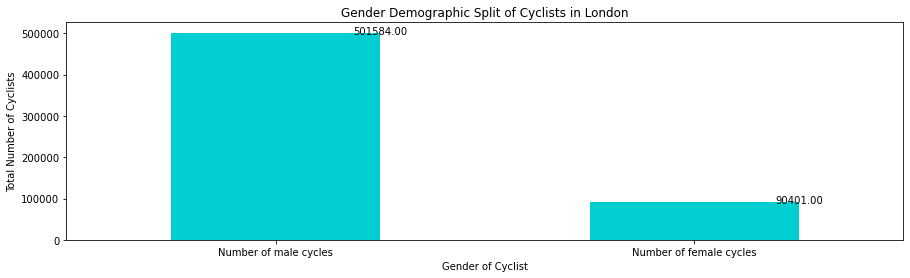

In [11]:
plt.figure(figsize=(15,4))
plots = Outer_London[Outer_London.columns[10:12]].sum().plot.bar(rot=0, color='DarkTurquoise')
plt.xlabel("Gender of Cyclist")
plt.ylabel('Total Number of Cyclists')
plt.title("Gender Demographic Split of Cyclists in London")

for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 1,
                    bar.get_height()), ha='center', va='center',
                   size=10, xytext=(0, 2),
                   textcoords='offset points')

plt.show()

### Do men and women cycle at different times

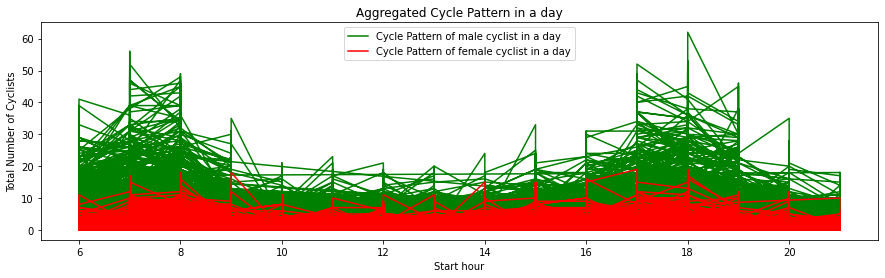

In [13]:
plt.figure(figsize=(15,4))
# Plot a simple line chart
plots = plt.plot(Outer_London['Start hour'], Outer_London['Number of male cycles'], color='g', label='Cycle Pattern of male cyclist in a day')

# Plot another line on the same chart/graph
plots = plt.plot(Outer_London['Start hour'], Outer_London['Number of female cycles'], color='r', label='Cycle Pattern of female cyclist in a day')
    
plt.xlabel("Start hour")
plt.ylabel('Total Number of Cyclists')
plt.title("Aggregated Cycle Pattern in a day")
plt.legend()
plt.show()

### How can male cyclist impact total cycles

In [30]:
y = Outer_London["Number of male cycles"].values.reshape(-1,1)
x = Outer_London["Total cycles"].values.reshape(-1,1)

In [31]:
lm = LinearRegression()

lm.fit(x,y)

LinearRegression()

In [32]:
lm.predict(x)

array([[2.51176433],
       [2.51176433],
       [1.67750695],
       ...,
       [0.00899219],
       [0.00899219],
       [0.84324957]])

In [33]:
lm.intercept_

array([0.00899219])

In [34]:
lm.coef_

array([[0.83425738]])

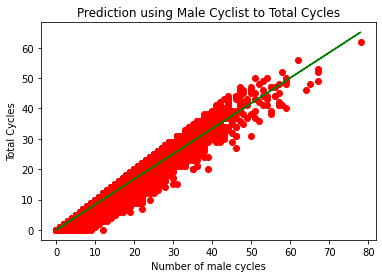

In [35]:
# [1] Create a scatterplot (with red data points). 
plt.scatter(x, y, color = "red")  
# [2] Create a regression line in green.
plt.plot(x, lm.predict(x), color = "green") 
# [3] Set the title for the graph.
plt.title("Prediction using Male Cyclist to Total Cycles") 
# [4] Set the label for the x-axis.
plt.xlabel("Number of male cycles") 
# [5] Set the label for the y-axis.
plt.ylabel("Total Cycles")
# [6] Print the graph. 
plt.show() 

In [36]:
#We can predict male cycles in the future
predict_Total_Cycles = lm.predict([[100]])

print(predict_Total_Cycles)

[[83.4347302]]


### How can female cyclist impact total cycles

In [37]:
y = Outer_London["Number of female cycles"].values.reshape(-1,1)
x = Outer_London["Total cycles"].values.reshape(-1,1)

In [38]:
lm = LinearRegression()

lm.fit(x,y)

LinearRegression()

In [39]:
lm.predict(x)

array([[ 0.46693361],
       [ 0.46693361],
       [ 0.30648045],
       ...,
       [-0.01442586],
       [-0.01442586],
       [ 0.1460273 ]])

In [40]:
lm.intercept_

array([-0.01442586])

In [41]:
lm.coef_

array([[0.16045316]])

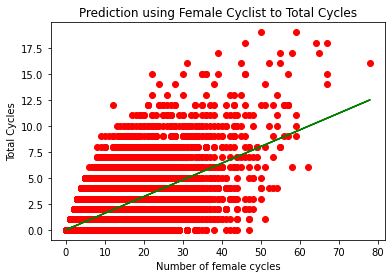

In [44]:
# [1] Create a scatterplot (with red data points). 
plt.scatter(x, y, color = "red")  
# [2] Create a regression line in green.
plt.plot(x, lm.predict(x), color = "green") 
# [3] Set the title for the graph.
plt.title("Prediction using Female Cyclist to Total Cycles") 
# [4] Set the label for the x-axis.
plt.xlabel("Number of female cycles") 
# [5] Set the label for the y-axis.
plt.ylabel("Total Cycles")
# [6] Print the graph. 
plt.show() 

In [43]:
#We can predict female cycles in the future
predict_Total_Cycles = lm.predict([[100]])

print(predict_Total_Cycles)

[[16.03088975]]
